In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify 
from pypalettes import load_cmap
from pyfonts import load_font
from highlight_text import fig_text, ax_text

In [2]:
plt.rcParams["font.family"] = "Lato"

In [3]:
cmap = load_cmap("badbunny2")

In [4]:
nsf_terminations = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-06/nsf_terminations.csv')

In [5]:
states = nsf_terminations.groupby("org_state")["directorate_abbrev"].value_counts(dropna=False).reset_index()

In [6]:
states = states.sort_values(by=["org_state","count"], ascending=[True, False], ignore_index=True)

In [7]:
df = states.copy()

In [8]:
# Color mapping
df['directorate_abbrev'] = df['directorate_abbrev'].fillna('UNK')
unique_subs = df['directorate_abbrev'].unique()
color_dict = {sub: cmap(i) if sub != 'UNK' else 'grey' for i, sub in enumerate(unique_subs)}
df['color'] = df['directorate_abbrev'].map(color_dict)
# Lists
dem = ["CA", "CO", "CT", "DC", "DE", "HI", "IL", "MA", "MD", "NJ", "NY", "OR", "RI", "VT", "WA", "ME", "NH", "NM", "VA", "MN"]
nev = ["PR", "VI"]

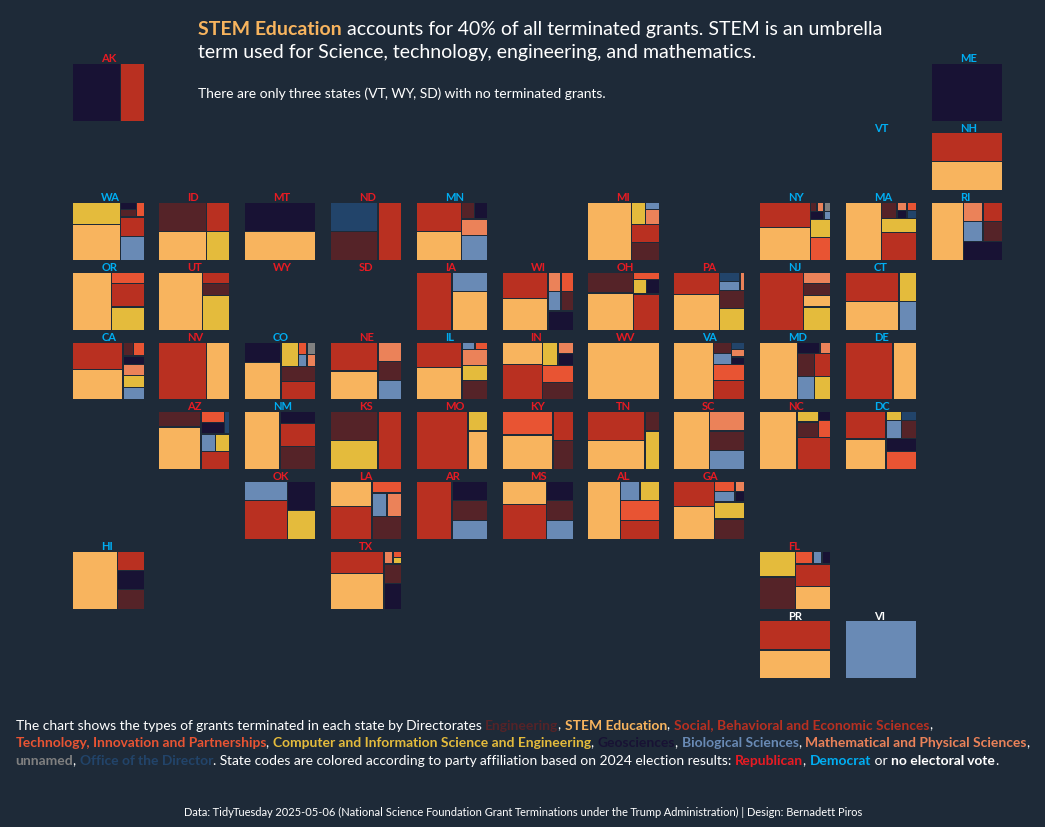

In [10]:
# Grid setup
nrows, ncols = 9, 11
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axs = axs  # 2D array

# Axes to remove
rows_to_remove = [
    (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9), 
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), 
                           (2,5),        (2,7), 
                                          (3,10), 
                                          (4,10), 
    (5,0),                            (5,10), 
    (6,0), (6,1),           (6,8), (6,9), (6,10), 
           (7,1), (7,2),        (7,4), (7,5), (7,6), (7,7),      (7,9), (7,10),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7),             (8,10)
]

# State labels
letters_state = ['AK', 'ME', 'VT', 'NH', 'WA', 'ID', 'MT', 'ND', 'MN', 'MI', 'NY',
                 'MA', 'RI', 'OR', 'UT', 'WY', 'SD', 'IA', 'WI', 'OH', 'PA',
                 'NJ', 'CT', 'CA', 'NV', 'CO', 'NE', 'IL', 'IN', 'WV', 'VA',
                 'MD', 'DE', 'AZ', 'NM', 'KS', 'MO', 'KY', 'TN', 'SC', 'NC',
                 'DC', 'OK', 'LA', 'AR', 'MS', 'AL', 'GA', 'HI', 'TX', 'FL',
                 'PR', 'VI']

# Subplots
state = 0
for row in range(nrows):
    for col in range(ncols):
        ax = axs[row, col]

        if (row, col) in rows_to_remove:
            ax.axis('off')
        else:
            ax.set_xticks([])
            ax.set_yticks([])
            letters = letters_state[state]
            letters_color = "#00AEF3" if letters in dem else "white" if letters in nev else "#E81B23"   
            ax.annotate(letters, xy=(0.4, 1.03), xycoords='axes fraction', color=letters_color, fontsize=8, weight="bold")
            state += 1

            # Filter data for this state
            state_data = df[df['org_state'] == letters]
            if not state_data.empty:
                squarify.plot(
                    sizes=state_data['count'],                    
                    label=None,
                    color=state_data['color'],
                    ax=ax,
                    pad=True
                )
            ax.axis('off')  

txt1 = (
      "The chart shows the types of grants terminated in each state by Directorates <Engineering>, <STEM Education>, <Social, Behavioral and Economic Sciences>,\n"
      "<Technology, Innovation and Partnerships>, <Computer and Information Science and Engineering>, <Geosciences>, <Biological Sciences>, <Mathematical and Physical Sciences>,\n"
      "<unnamed>, <Office of the Director>. State codes are colored according to party affiliation based on 2024 election results: <Republican>, <Democrat> or <no electoral vote>."            
      )


fig_text(0.5, 0.06, s=txt1, color="white", ha="center", va="top",
         highlight_textprops=[
             {"color": cmap.colors[6], "weight":"bold"},  #ENG
             {"color": cmap.colors[2], "weight":"bold"},  #EDU
             {"color": cmap.colors[1], "weight":"bold"},  #SBE
             {"color": cmap.colors[3], "weight":"bold"},  #TIP
             {"color": cmap.colors[5], "weight":"bold"},  #CISE
             {"color": cmap.colors[0], "weight":"bold"},  #GEO
             {"color": cmap.colors[4], "weight":"bold"},  #BIO
             {"color": cmap.colors[8], "weight":"bold"},  #MPS
             {"color": "grey", "weight":"bold"},          #nan
             {"color": cmap.colors[7], "weight":"bold"},  #OD   
             {"color": "#E81B23", "weight":"bold"},                       
             {"color": "#00AEF3", "weight":"bold"},
             {"color": "white", "weight":"bold"} 
             ])

txt2 = '''
       <STEM Education> accounts for 40% of all terminated grants. STEM is an umbrella
       term used for Science, technology, engineering, and mathematics.\n\n\n
       <There are only three states (VT, WY, SD) with no terminated grants.>
       '''

fig_text(0.5, 0.94, s=txt2, color="white", fontsize=14, ha="center", 
         highlight_textprops=[
             {"color": cmap.colors[2], "weight":"bold"},
             {"fontsize": 10},
             ])         

fig.set_facecolor("#1E2A38")

fig.text(0.5, -0.06, "Data: TidyTuesday 2025-05-06 (National Science Foundation Grant Terminations under the Trump Administration) | Design: Bernadett Piros",
         color="white", size=8, ha="center")

plt.show()

#fig.savefig("2025-05-06.png", bbox_inches='tight', pad_inches=0.2)